In [463]:
import calendar
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
inven_path='Data\\Inventory Dataset.xlsx'
new_inv_path='Data\\New Inventory.xlsx'
sold_inv_path='Data\Sales Dataset.xlsx'

In [465]:
df_inventory=pd.read_excel(inven_path)
df_new_arrivals=pd.read_excel(new_inv_path)
df_sold=pd.read_excel(sold_inv_path)

In [466]:
df_sold['Sales U']=df_sold['Sales U']*-1

In [467]:
df_sold['Sales U']

0        -2
1        -1
2        -1
3        -8
4        -1
       ... 
9449    -28
9450   -389
9451   -182
9452    -16
9453   -391
Name: Sales U, Length: 9454, dtype: int64

## Inventory Dataset.xlsx

In [468]:
print("The Inventory dataset contains {} rows and {} columns.".format(df_inventory.shape[0],df_inventory.shape[1]))


The Inventory dataset contains 356 rows and 3 columns.


In [469]:
len(df_inventory['Item Number'].unique())

356

## New Inventory.xlsx

In [470]:
print("The New inventory dataset contains {} rows and {} columns.".format(df_new_arrivals.shape[0],df_new_arrivals.shape[1]))

The New inventory dataset contains 1039 rows and 3 columns.


In [471]:
len(df_new_arrivals['Item Number'].unique())

213

In [472]:
len(df_new_arrivals['Inventory Receive'].unique())

23

The inventory data set contains 356 unique item numbers and the number of items in that inventory. The new inventory dataset contains 1,039 rows of numbers <br> 
showing how many new items were added to inventory and when they arrived. The new inventory dataset contains 213 unique items, which means that out of 356 items,<br>
only 213 items were received on 23 different unique dates.

In [473]:

df_new_arrivals['Inventory Receive']= pd.to_datetime(df_new_arrivals['Inventory Receive'])
df_inventory['Date']=pd.to_datetime(df_inventory['Date'])
#df_inventory=df_inventory.sort_values(by=['Inventory Receive'],)

## Merging both files

In [474]:
df_merged = pd.merge(df_inventory, df_new_arrivals, on='Item Number', how='outer')
df_merged=df_merged.sort_values(by=['Inventory Receive'],ascending=True,key=lambda x: x.astype(np.int64))


In [475]:
#df_conct_merged=pd.merge(df_inventory, concat_df, on='Item Number', how='outer')

In [476]:
pivot_table = df_merged.pivot_table(values='Total Item Qty', 
                             index='Item Number', 
                             columns='Inventory Receive', 
                             aggfunc='sum', 
                             fill_value=0)


In [477]:
df_sold.columns

Index(['Item Number', 'Date', 'Sales U'], dtype='object')

In [478]:

for item_num,row in pivot_table.iterrows():
    try:
        on_stock = df_inventory[df_inventory['Item Number'] == item_num]['Inventory']
        on_stock=int(on_stock)
    except:
        on_stock=0

    for k in pivot_table.columns:
        on_stock=on_stock+row[k]
        row[k]=on_stock
        
    

C:\Users\prabh\AppData\Local\Temp\ipykernel_12728\4281683759.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  on_stock=int(on_stock)


## Visualization

In [479]:
df_merged.columns

Index(['Item Number', 'Date', 'Inventory', 'Inventory Receive',
       'Total Item Qty'],
      dtype='object')

In [480]:
df_merged["Month"]=df_merged['Inventory Receive'].dt.month

In [481]:
month_total=df_merged.groupby('Month')['Total Item Qty'].sum()
#month_total=Inventory_Receive_sum=df_merged.groupby('Month')['Total Item Qty'].sum()

In [482]:
Inventory_sum=df_inventory['Inventory'].sum()
month_total[6]=Inventory_sum
month_total=month_total.sort_index(ascending=True)
month_total=pd.DataFrame(month_total)

In [483]:
item_recived=month_total

In [484]:
month_names = [calendar.month_name[i] for i in range(6, 13)]

In [485]:

for x in range(7, 6 + len(month_total['Total Item Qty'])):
    month_total.loc[x, 'Total Item Qty'] = month_total.loc[x - 1, 'Total Item Qty'] + month_total.loc[x, 'Total Item Qty']


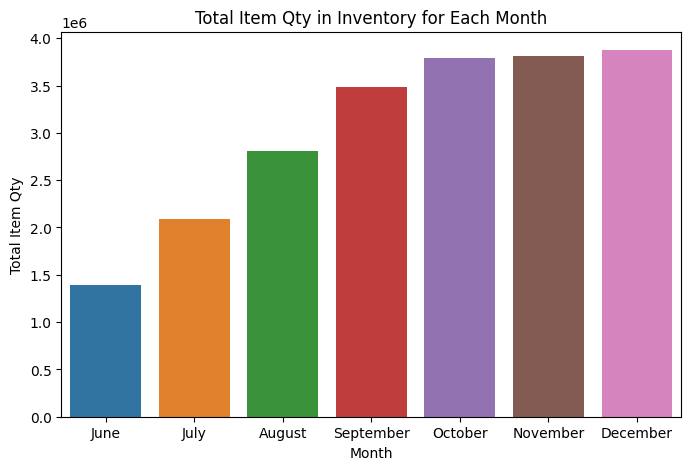

In [486]:
plt.figure(figsize=(8, 5))
sns.barplot(x=month_names, y=month_total['Total Item Qty'])

plt.xlabel('Month')
plt.ylabel('Total Item Qty')
plt.title('Total Item Qty in Inventory for Each Month')
plt.savefig('plots\\total_item_qty_plot.png')
plt.show()

In [487]:
recived=df_merged.groupby('Month')['Total Item Qty'].sum().values
recived=list(recived)
recived

[698592.0, 726094.0, 670252.0, 303826.0, 24848.0, 63172.0]

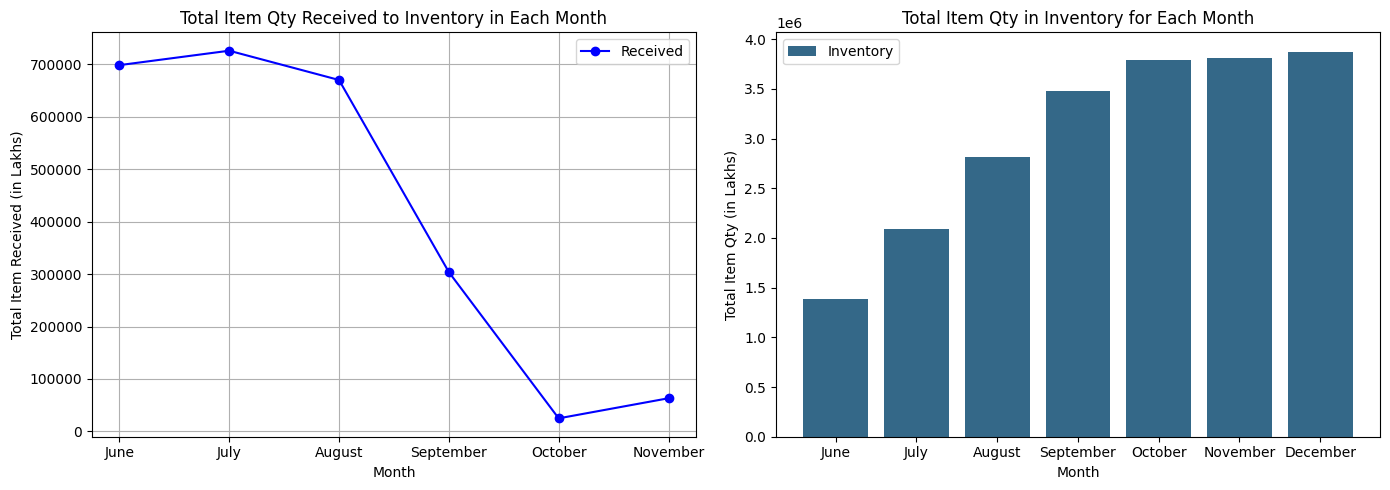

In [488]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Line plot
axs[0].plot(month_names[:-1], recived, marker='o', color='blue', label='Received')
axs[0].set_title('Total Item Qty Received to Inventory in Each Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Item Received (in Lakhs)')
axs[0].grid(True)
axs[0].legend()

# Bar plot
axs[1].bar(month_names, month_total['Total Item Qty'], color='#346888', label='Inventory')
axs[1].set_title('Total Item Qty in Inventory for Each Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Item Qty (in Lakhs)')
#axs[1].grid(True)
axs[1].legend()


plt.tight_layout()


plt.savefig('plots\\multiple_charts.png')

# Show the plots
plt.show()

Their interpretation provides valuable insight into inventory trends throughout the year. The observation that inventory additions are high in October-November and that inventory levels are at their lowest in June indicates that there may be a seasonality or pattern in inventory management. Additionally, given that on-hand inventory peaks at the end of the year, with around 3,000 stocks in circulation, this highlights the importance of year-end inventory management and its impact on overall levels. of stocks. , 

# Sales dataset

In [489]:
modified_sold_df={'Item Number':df_sold['Item Number'], 'Inventory Receive':df_sold['Date'], 'Total Item Qty':df_sold['Sales U']}
modified_sold_df=pd.DataFrame(modified_sold_df)

In [490]:
concat_df=pd.concat([modified_sold_df, df_new_arrivals], axis=0)

In [491]:
concat_df['Inventory Receive'] = pd.to_datetime(concat_df['Inventory Receive'])
concat_df['Inventory Receive'] = pd.to_datetime(concat_df['Inventory Receive'], format='%d/%m/%Y')


In [492]:

# Now you can extract the month
concat_df['Month'] = concat_df['Inventory Receive'].dt.month

In [493]:
concat_df = concat_df.sort_values(by='Inventory Receive', ascending=True)

In [494]:
concat_df

,Item Number,Inventory Receive,Total Item Qty,Month
5164,064-11-5125,2023-06-03,-952,6
7952,064-18-6538,2023-06-03,-25,6
5888,064-13-0010,2023-06-03,-59,6
5889,064-13-0010,2023-06-03,-1006,6
7953,064-18-6538,2023-06-03,-413,6
...,...,...,...,...
456,064-18-0170,2023-12-01,18360,12
779,064-18-4752,2023-12-08,8076,12
778,064-18-0309,2023-12-08,8076,12
775,064-18-0170,2023-12-15,4860,12


In [495]:
sales_pivot = concat_df.pivot_table(values='Total Item Qty', 
                             index='Item Number', 
                             columns='Inventory Receive', 
                             aggfunc='sum', 
                             fill_value=0)


In [496]:
sales_pivot

Inventory Receive,2023-06-03,2023-06-10,2023-06-17,2023-06-24,2023-07-01,2023-07-07,2023-07-08,2023-07-09,2023-07-10,2023-07-14,...,2023-10-21,2023-10-22,2023-10-28,2023-11-04,2023-11-11,2023-11-18,2023-11-26,2023-12-01,2023-12-08,2023-12-15
Item Number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0,0,0,0,0,0,0,0,0,0,...,-317,0,-351,-411,-585,-473,0,0,0,0
064-01-0005,0,0,-1,0,0,0,0,0,0,0,...,-701,0,-835,-952,-1263,-1060,0,0,0,0
064-01-0006,0,-1,0,0,0,0,0,0,0,0,...,-2,0,0,0,0,0,0,0,0,0
064-01-0012,0,0,0,0,0,0,0,0,0,0,...,-1122,0,-1374,-1519,-1868,-1451,0,0,0,0
064-01-0013,0,0,0,0,0,0,0,0,0,0,...,-505,0,-581,-655,-891,-731,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9724,-639,-556,-588,-613,-664,1600,-654,4260,0,0,...,-519,0,-538,-560,-662,-557,0,0,0,0
064-18-9884,-729,-595,-482,-482,-453,0,-454,0,0,0,...,-20,0,-7,-5,-13,-5,0,0,0,0
064-18-9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18700,0,5100


In [497]:

for item_num,row in sales_pivot.iterrows():
    try:
        on_stock = df_inventory[df_inventory['Item Number'] == item_num]['Inventory']
        on_stock=int(on_stock)
    except:
        on_stock=0

    for k in sales_pivot.columns:
        on_stock=on_stock+row[k]
        row[k]=on_stock
        
    

C:\Users\prabh\AppData\Local\Temp\ipykernel_12728\1389309057.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  on_stock=int(on_stock)


In [498]:
sales_pivot

Inventory Receive,2023-06-03,2023-06-10,2023-06-17,2023-06-24,2023-07-01,2023-07-07,2023-07-08,2023-07-09,2023-07-10,2023-07-14,...,2023-10-21,2023-10-22,2023-10-28,2023-11-04,2023-11-11,2023-11-18,2023-11-26,2023-12-01,2023-12-08,2023-12-15
Item Number,,,,,,,,,,,,,,,,,,,,,
064-01-0003,0,0,0,0,0,0,0,0,0,0,...,6754,6754,6403,5992,5407,4934,4934,4934,4934,4934
064-01-0005,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,8571,8571,7736,6784,5521,4461,4461,4461,4461,4461
064-01-0006,10,9,9,9,9,9,9,9,9,9,...,3,3,3,3,3,3,3,3,3,3
064-01-0012,0,0,0,0,0,0,0,0,0,0,...,8025,8025,6651,5132,3264,1813,1813,1813,1813,1813
064-01-0013,0,0,0,0,0,0,0,0,0,0,...,7210,7210,6629,5974,5083,4352,4352,4352,4352,4352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9724,6700,6144,5556,4943,4279,5879,5225,9485,9485,9485,...,4196,4196,3658,3098,2436,1879,1879,1879,1879,1879
064-18-9884,11690,11095,10613,10131,9678,9678,9224,9224,9224,9224,...,-299,-299,-306,-311,-324,-329,-329,-329,-329,-329
064-18-9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18700,18700,23800


In [499]:
sales=concat_df.groupby('Month')['Total Item Qty'].sum().values

In [500]:
df_sold['Month']=df_sold['Date'].dt.month
#concat_df['Inventory Receive'] = pd.to_datetime(concat_df['Inventory Receive'], format='%d/%m/%Y')

In [519]:
sold_month=(df_sold.groupby('Month')['Sales U'].sum().values)*-1

In [502]:
df_new_arrivals['Month']=df_new_arrivals['Inventory Receive'].dt.month

In [503]:
arival_per_month= df_new_arrivals.groupby('Month')['Total Item Qty'].sum()
print(arival_per_month)

Month
7     698592
8     726094
9     670252
10    303826
11     24848
12     63172
Name: Total Item Qty, dtype: int64


In [504]:
total_inven=df_inventory['Inventory'].sum()
print("total inv at time of june",total_inven)

total inv at time of june 1388034


In [505]:
recived=list(recived)

In [516]:
net_stock=net_stock.values
net_stock=list(net_stock)
net_stock.insert(0,total_inven)

In [507]:
recived

[1388034, 698592.0, 726094.0, 670252.0, 303826.0, 24848.0, 63172.0]

In [510]:
month_names

['June', 'July', 'August', 'September', 'October', 'November', 'December']

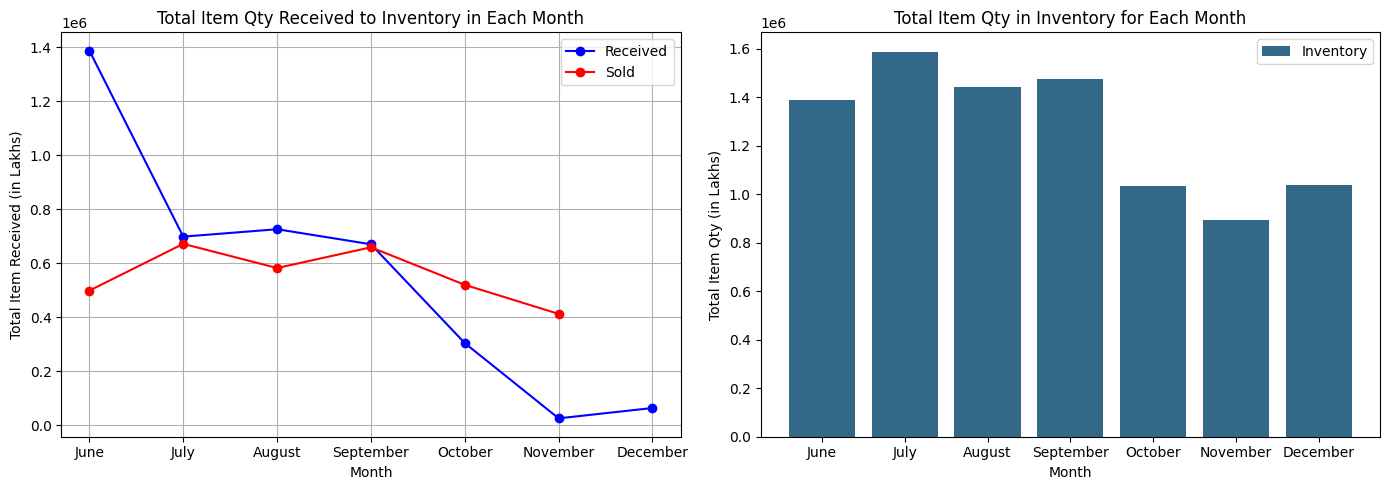

In [518]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Line plot
axs[0].plot(month_names, recived, marker='o', color='blue', label='Received')
axs[0].plot(month_names[:-1], sold_month, marker='o', color='red', label='Sold')
axs[0].set_title('Total Item Qty Received to Inventory in Each Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Item Received (in Lakhs)')
axs[0].grid(True)
axs[0].legend()

# Bar plot
axs[1].bar(month_names, net_stock , color='#346888', label='Inventory')
axs[1].set_title('Total Item Qty in Inventory for Each Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Item Qty (in Lakhs)')
#axs[1].grid(True)
axs[1].legend()


plt.tight_layout()


plt.savefig('plots\\sale_chart.png')

# Show the plots
plt.show()